# ABOUT DATASET:
The dataset has the columns correspond to various features of the employee's job and performance.

# OBJECTIVE:
__To create a model to predict Whether the Employee will leave the Company or not__

__Retention Analysis: Create a predictive model to determine the factors that contribute to employee turnover and identify potential retention strategies__

__Employee Engagement Analysis: Use machine learning techniques to analyze employee data and identify patterns that indicate disengagement or dissatisfaction, leading to potential attrition__


__Human Resources Decision Support: Build a model to support HR decision-making by predicting the likelihood of an employee leaving the company based on various factor__

# INPUT FEATURES:-
1. __satisfaction_level__		
2. __number_project__	
3. __average_montly_hours__	
4. __time_spend_company__		
5. __promotion_last_5years__	
6. __Department__
6. __salary__

# OUTPUT FEATURES:-
 1. __left__

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Getting Data

In [3]:
raw_data = pd.read_csv("EmployeeSurveyData.csv")

In [4]:
raw_data

,TimeStamp,Name,IT Company,Satisfaction Level,Number Of Project,Average Monthly Hours,Time Spend Company,Work accident,Left,Promotion Last Five years,Department,Salary
0,8/26/2023,Aarav Patel,Infosys,Low,2,157,3,No,Yes,No,sales,low
1,8/26/2023,Aisha Sharma,HCL,Very High,5,262,6,No,Yes,No,sales,medium
2,8/26/2023,Arjun Gupta,Tech Mahindra,Very Low,7,272,4,No,Yes,No,sales,medium
3,8/26/2023,Diya Singh,Cognizant,High,5,223,5,No,Yes,No,sales,low
4,8/26/2023,Ishaan Verma,Wipro,Low,2,159,3,No,Yes,No,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...
522,8/28/2023,Ishika Chauhan,Accenture,High,3,231,3,No,No,No,technical,low
523,8/28/2023,Jia Patel,HCL,Very High,3,259,4,No,No,No,technical,low
524,8/28/2023,Kashvi Kapoor,Tech Mahindra,High,3,238,2,No,No,No,technical,low
525,8/28/2023,Krishiv Mehta,Infosys,High,3,210,3,No,No,No,technical,low


#### Removing unnecessary columns

In [5]:
# timestamp and name columns 

raw_data.drop(['TimeStamp' , 'Name'],axis = 1 , inplace=True)

In [6]:
raw_data

,IT Company,Satisfaction Level,Number Of Project,Average Monthly Hours,Time Spend Company,Work accident,Left,Promotion Last Five years,Department,Salary
0,Infosys,Low,2,157,3,No,Yes,No,sales,low
1,HCL,Very High,5,262,6,No,Yes,No,sales,medium
2,Tech Mahindra,Very Low,7,272,4,No,Yes,No,sales,medium
3,Cognizant,High,5,223,5,No,Yes,No,sales,low
4,Wipro,Low,2,159,3,No,Yes,No,sales,low
...,...,...,...,...,...,...,...,...,...,...
522,Accenture,High,3,231,3,No,No,No,technical,low
523,HCL,Very High,3,259,4,No,No,No,technical,low
524,Tech Mahindra,High,3,238,2,No,No,No,technical,low
525,Infosys,High,3,210,3,No,No,No,technical,low


### Lets Take Initial Review of Data

In [7]:
raw_data.shape

(527, 10)

In [8]:
raw_data.isnull().sum()

IT Company                    6
Satisfaction Level            0
Number Of Project             0
Average Monthly Hours         0
Time Spend Company            0
Work accident                 0
Left                          0
Promotion Last Five years     0
Department                    0
Salary                        0
dtype: int64

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   IT Company                  521 non-null    object
 1   Satisfaction Level          527 non-null    object
 2   Number Of Project           527 non-null    int64 
 3   Average Monthly Hours       527 non-null    int64 
 4   Time Spend Company          527 non-null    int64 
 5   Work accident               527 non-null    object
 6   Left                        527 non-null    object
 7   Promotion Last Five years   527 non-null    object
 8   Department                  527 non-null    object
 9   Salary                      527 non-null    object
dtypes: int64(3), object(7)
memory usage: 41.3+ KB


#### Checking Duplicate

In [10]:
raw_data.duplicated().sum()

0

In [11]:
raw_data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

## EDA

## Salary Count

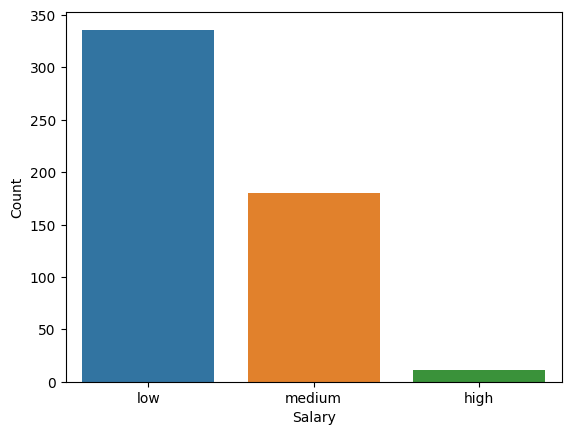

low       336
medium    180
high       11
Name: Salary, dtype: int64

In [12]:
sns.countplot(data=raw_data, x='Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


count_values = raw_data['Salary'].value_counts()
count_values

##### Larger number of employees are **underpaid**

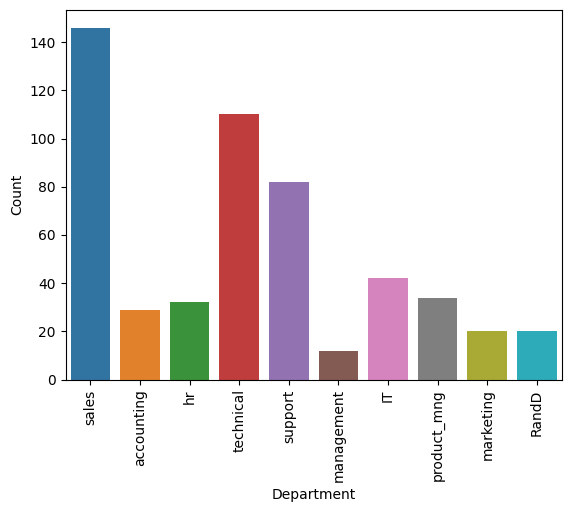

sales          146
technical      110
support         82
IT              42
product_mng     34
hr              32
accounting      29
marketing       20
RandD           20
management      12
Name: Department, dtype: int64

In [13]:
sns.countplot(data=raw_data, x='Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

count_values = raw_data['Department'].value_counts()
count_values

#### **Sales** has the highest number of employess!

### Department VS Average monthly hour

In [14]:
Working_hours_dep=raw_data.groupby('Department')['Average Monthly Hours'].mean()
Working_hours_dep

Department
IT             224.714286
RandD          200.500000
accounting     191.620690
hr             198.125000
management     202.500000
marketing      203.800000
product_mng    209.588235
sales          205.000000
support        193.902439
technical      204.000000
Name: Average Monthly Hours, dtype: float64

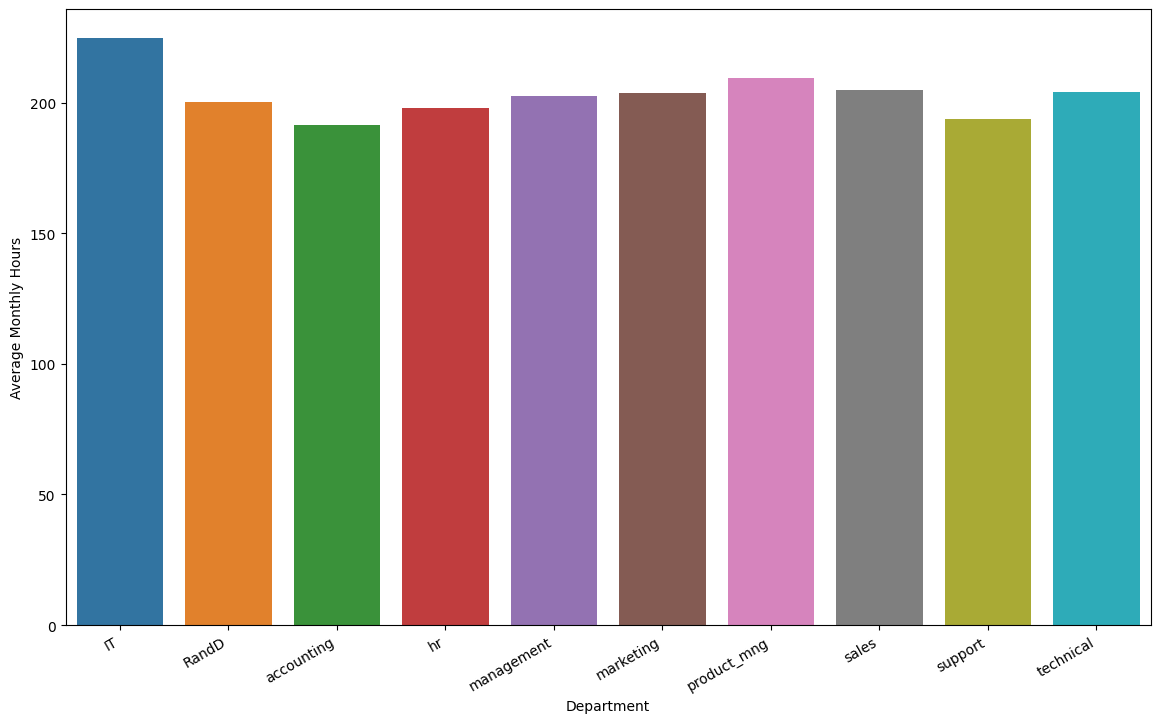

In [15]:
fig = plt.figure(figsize=(14,8))
ax=sns.barplot(x=Working_hours_dep.index,y= Working_hours_dep)
ax.set_xticklabels(Working_hours_dep.index,rotation=30,ha='right')
plt.show()

#### **IT** has a bit higher average monthly hours. Otherwise all the departments have almost same working hours.

## Average Monthly Hours count

In [16]:
Working_hours_sal=raw_data.groupby('Salary')['Average Monthly Hours'].mean()
Working_hours_sal

Salary
high      190.545455
low       202.008929
medium    207.088889
Name: Average Monthly Hours, dtype: float64

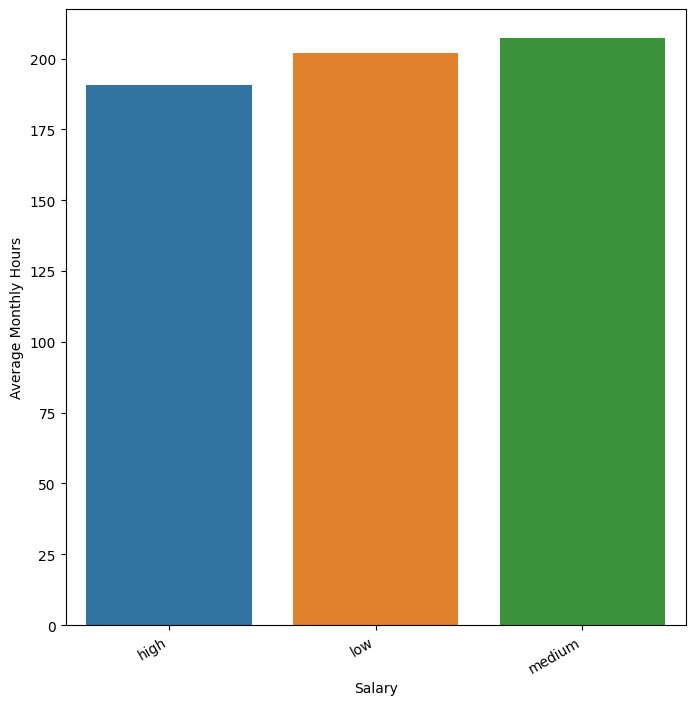

In [17]:
fig = plt.figure(figsize=(8,8))
ax=sns.barplot(x=Working_hours_sal.index,y= Working_hours_sal)
ax.set_xticklabels(Working_hours_sal.index,rotation=30,ha='right')
plt.show()

#### The working hours for high, low and medium salary workers are the same !

## Number of Employees  Left

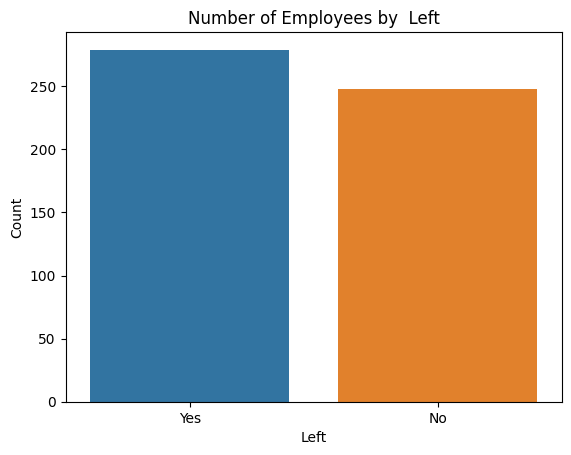

Percentage of Current Employees is 47.1% and of Ex-employees is: 52.9%
Yes: 279
No: 248


In [18]:
#Visualize the number of employees that stayes and left  the company
sns.countplot(data=raw_data, x='Left ')
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Number of Employees by  Left')
plt.show()

#Attrition percentage
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    raw_data[raw_data['Left '] == 'No'].shape[0] / raw_data.shape[0]*100,
    raw_data[raw_data['Left '] == 'Yes'].shape[0] / raw_data.shape[0]*100))


count_values = raw_data['Left '].value_counts()
for index, value in count_values.items():
    print(f"{index}: {value}")

## Department VS Left

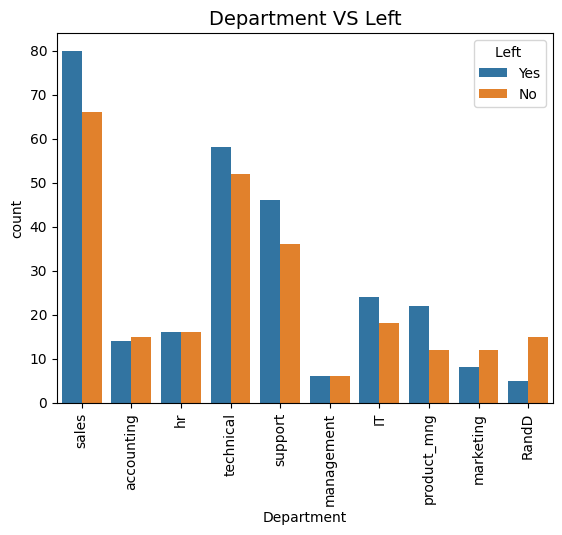

Left   Department 
No     sales          66
       technical      52
       support        36
       IT             18
       hr             16
       RandD          15
       accounting     15
       marketing      12
       product_mng    12
       management      6
Yes    sales          80
       technical      58
       support        46
       IT             24
       product_mng    22
       hr             16
       accounting     14
       marketing       8
       management      6
       RandD           5
Name: Department, dtype: int64


In [19]:
# Plotting Deparment and Attrition
sns.countplot(x='Department', hue='Left ', data=raw_data)
plt.title("Department VS Left", fontsize=14)
plt.xticks(rotation=90)
plt.show()

groupby_d = raw_data.groupby("Left ")["Department"]
print(groupby_d.value_counts())

In [20]:
# Calculating percentage for each department
total_resigned = raw_data['Left '].value_counts()['Yes']
total_departments = raw_data['Department'].nunique()

resigned_percentage_by_department = (raw_data[raw_data['Left '] == 'Yes']['Department'].value_counts() / total_resigned) * 100


print("Percentage of employees resigned/retired by Department:")
print(resigned_percentage_by_department)


Percentage of employees resigned/retired by Department:
sales          28.673835
technical      20.788530
support        16.487455
IT              8.602151
product_mng     7.885305
hr              5.734767
accounting      5.017921
marketing       2.867384
management      2.150538
RandD           1.792115
Name: Department, dtype: float64


# Plotting Job Satisfaction and Left count

## Satisfaction vs Left

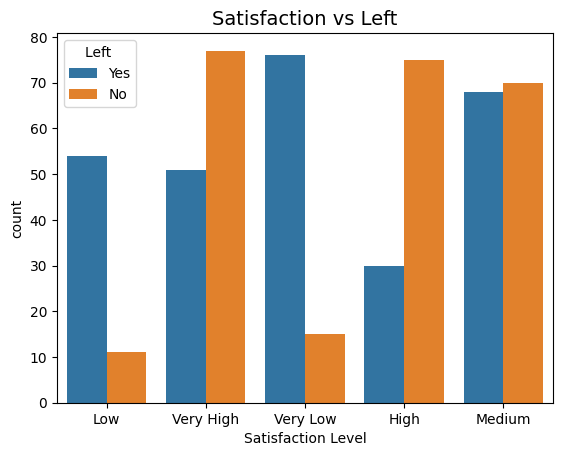

Left   Satisfaction Level
No     Very High             77
       High                  75
       Medium                70
       Very Low              15
       Low                   11
Yes    Very Low              76
       Medium                68
       Low                   54
       Very High             51
       High                  30
Name: Satisfaction Level, dtype: int64


In [21]:
# Plotting Job Satisfaction and Left count
sns.countplot(x='Satisfaction Level', hue='Left ', data=raw_data)
plt.title("Satisfaction vs Left", fontsize=14)
plt.show()

groupby_js = raw_data.groupby("Left ")["Satisfaction Level"]
print(groupby_js.value_counts())

In [22]:
# Calculating percentage for each job satisfaction level
total_resigned = raw_data['Left '].value_counts()['Yes']

resigned_percentage_by_job_satisfaction = (raw_data[raw_data['Left '] == 'Yes']['Satisfaction Level'].value_counts() / total_resigned) * 100

print("Percentage of employees resigned/retired by Job Satisfaction:")
print(resigned_percentage_by_job_satisfaction)

Percentage of employees resigned/retired by Job Satisfaction:
Very Low     27.240143
Medium       24.372760
Low          19.354839
Very High    18.279570
High         10.752688
Name: Satisfaction Level, dtype: float64


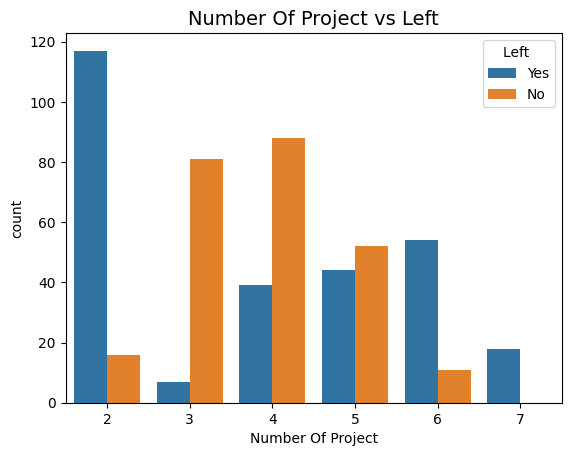

Left   Number Of Project
No     4                     88
       3                     81
       5                     52
       2                     16
       6                     11
Yes    2                    117
       6                     54
       5                     44
       4                     39
       7                     18
       3                      7
Name: Number Of Project, dtype: int64


In [23]:
# Plotting Job Satisfaction and Left count
sns.countplot(x='Number Of Project', hue='Left ', data=raw_data)
plt.title("Number Of Project vs Left", fontsize=14)
plt.show()

groupby_js = raw_data.groupby("Left ")["Number Of Project"]
print(groupby_js.value_counts())

In [24]:
# Calculating percentage for each Number Of Project
total_resigned = raw_data['Left '].value_counts()['Yes']

resigned_percentage_by_NOP = (raw_data[raw_data['Left '] == 'Yes']['Number Of Project'].value_counts() / total_resigned) * 100

print("Percentage of employees resigned/retired by Number Of Project:")
print(resigned_percentage_by_NOP)

Percentage of employees resigned/retired by Number Of Project:
2    41.935484
6    19.354839
5    15.770609
4    13.978495
7     6.451613
3     2.508961
Name: Number Of Project, dtype: float64


In [25]:
#from pandas_profiling import ProfileReport

#prof = ProfileReport(raw_data)

#prof.to_file(output_file = 'report.html')

# Checking Correlation B/w Input & Target Variable

In [26]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns
categorical_columns = ['Satisfaction Level', 'Work accident ', 'Left ', 'Promotion Last Five years ', 'Department', 'Salary']

# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

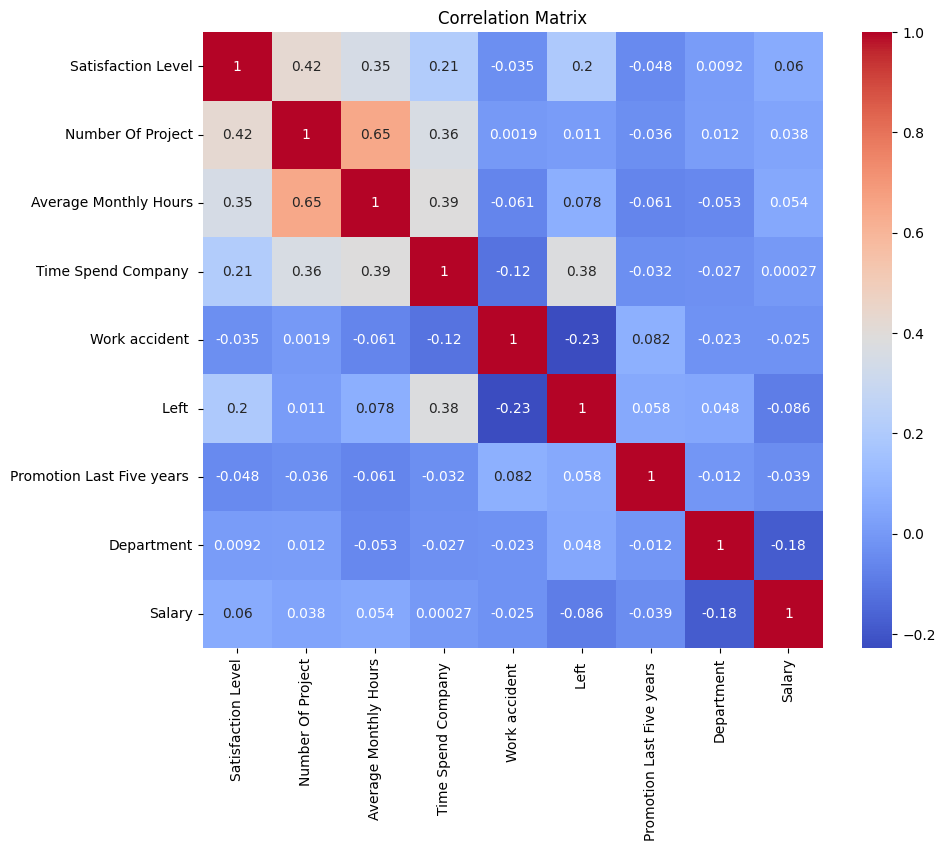

In [27]:


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [28]:
correlation_matrix

,Satisfaction Level,Number Of Project,Average Monthly Hours,Time Spend Company,Work accident,Left,Promotion Last Five years,Department,Salary
Satisfaction Level,1.000000,0.424392,0.351319,0.210930,-0.034887,0.196995,-0.048399,0.009226,0.059635
Number Of Project,0.424392,1.000000,0.645088,0.361867,0.001907,0.010854,-0.036270,0.012040,0.037505
Average Monthly Hours,0.351319,0.645088,1.000000,0.390429,-0.061293,0.077698,-0.061475,-0.053014,0.054105
Time Spend Company,0.210930,0.361867,0.390429,1.000000,-0.116142,0.376293,-0.032282,-0.027220,0.000270
Work accident,-0.034887,0.001907,-0.061293,-0.116142,1.000000,-0.228268,0.081971,-0.022585,-0.024719
Left,0.196995,0.010854,0.077698,0.376293,-0.228268,1.000000,0.058191,0.048024,-0.085588
Promotion Last Five years,-0.048399,-0.036270,-0.061475,-0.032282,0.081971,0.058191,1.000000,-0.012124,-0.038848
Department,0.009226,0.012040,-0.053014,-0.027220,-0.022585,0.048024,-0.012124,1.000000,-0.180392
Salary,0.059635,0.037505,0.054105,0.000270,-0.024719,-0.085588,-0.038848,-0.180392,1.000000


In [29]:
# Calculate the correlation of 'Left' with other attributes
left_corr = correlation_matrix['Left ']

# Remove 'Left' from the correlation series
left_corr = left_corr.drop('Left ')

# Sort the correlation series in descending order
sorted_corr = left_corr.abs().sort_values(ascending=False)

# Get the top 3 highly correlated attributes with 'Left'
top_pos_corr = sorted_corr.head(3)
top_neg_corr = sorted_corr.tail(3)

# Print the top 3 highly correlated attributes with 'Left'
print("Top 3 highly correlated attributes with 'Left':")
for attribute, correlation in top_pos_corr.items():
    print(f"{attribute}: {correlation}")

# Print the top 3 negatively correlated attributes with 'Left'
print("\nTop 3 negatively correlated attributes with 'Left':")
for attribute, correlation in top_neg_corr.items():
    print(f"{attribute}: {correlation}")


Top 3 highly correlated attributes with 'Left':
Time Spend Company : 0.3762925659340567
Work accident : 0.2282679936481802
Satisfaction Level: 0.19699501328441535

Top 3 negatively correlated attributes with 'Left':
Promotion Last Five years : 0.05819143739626466
Department: 0.04802363393670894
Number Of Project: 0.010854442073568863


## Checking Outliers

<Figure size 1000x800 with 0 Axes>

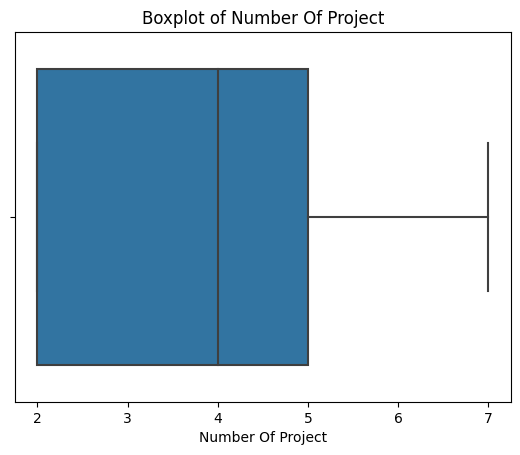

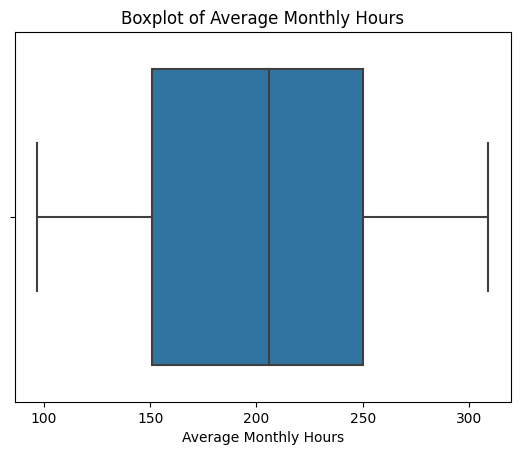

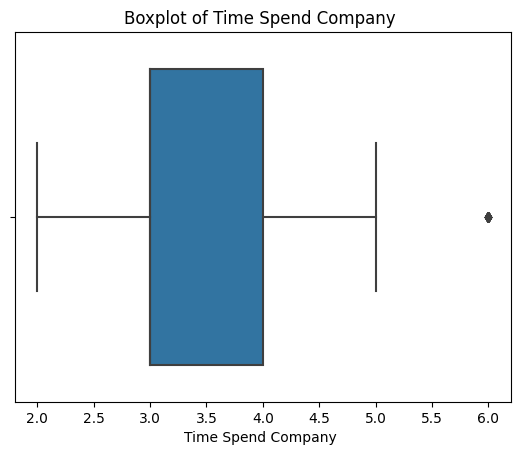

In [30]:
# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Select the numerical columns for outlier detection
numerical_columns = ['Number Of Project', 'Average Monthly Hours', 'Time Spend Company ']

# Generate box plots for each numerical column
plt.figure(figsize=(10, 8))
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=column, data=data)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [33]:
# Select the categorical columns
categorical_columns = ['Satisfaction Level', 'Work accident ', 'Left ', 'Promotion Last Five years ', 'Department', 'Salary']

# Create a copy of the DataFrame to work with
data = raw_data.copy()

# Encode the categorical columns using label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

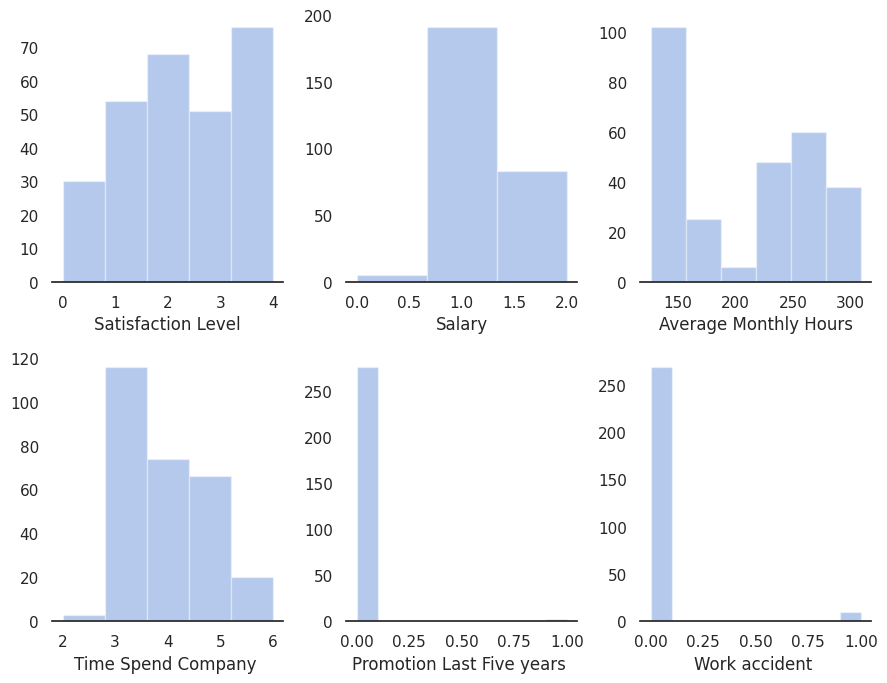

In [35]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = data.loc[data['Left '] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['Satisfaction Level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['Salary'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['Average Monthly Hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['Time Spend Company '], kde=False, bins=5, color="b", ax=axes[1, 0])
sns.distplot(leavers['Promotion Last Five years '],bins=10, kde=False, color="b", ax=axes[1,1])
sns.distplot(leavers['Work accident '], bins=10,kde=False, color="b", ax=axes[1, 2])
plt.tight_layout()
plt.show()

In [37]:
print("So, from the plots we can see that most of the employees that left the company left because of the following reasons -:\n1.Salary \n2.Average Montly Hours \n3.satisfaction level\n")

So, from the plots we can see that most of the employees that left the company left because of the following reasons -:
1.Salary 
2.Average Montly Hours 
3.satisfaction level



## Model Building